In [1]:
!pip install gurobipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.2 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:

import os
import sys
# path = os.path.dirname(os.getcwd())
# sys.path.insert(0, path)

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/SVR_CG')
from Codes.model import *
from Codes.utils import *

from scipy import stats
import pickle
sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsResult')
RESULT_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsResult"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/Datasets')
DATA_DIR = "/content/gdrive/MyDrive/SVR_Codes/Datasets"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo')
DATAINFO_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo"

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn.preprocessing import StandardScaler




In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'abalone.data'), header=None) 
f = 7
K = 3
X = df.iloc[:,1:f+1]
y = df.iloc[:,f+1:f+2]

cols = [ 'X' + str(i+1) for i in range(f) ]
cols+=['Y']


scaler = StandardScaler()
df_data = scaler.fit_transform(np.c_[X,y])
df_data = pd.DataFrame(df_data, columns = cols)



In [ ]:
df_data

,X1,X2,X3,X4,X5,X6,X7,Y
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [ ]:

# EM Greedy

weights_list_greedy = []
bias_list_greedy = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    greedy = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=seed )
    greedy.set_model(Cl_SVR_greedy(Kmeans_init = False, outputFlag=False, tol = 0.05, time = 0.5, step_plots=False))

    greedy.fit(df_data )


    time_list.append(greedy.run_time) 
    epsVal_list.append(greedy.model_optVal)
    weights_list_greedy.append(greedy.weights)
    bias_list_greedy.append(greedy.bias)


print("\n\nResults for EM Greedy" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_greedy = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for EM Greedy: ", epsVal_result_greedy)


time_result_greedy = np.mean(time_list)
print("Average time taken for EM Greedy ", time_result_greedy, "\n")

Clusterwise-Regression model with SVR - Greedy algorithm
# of outliers:  0
Iteration:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeL

In [ ]:

# KM LR Greedy

weights_list_kmlr = []
bias_list_kmlr = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kmlr = CLR(K =K , f = f, random_state=seed )
    kmlr.set_model(km_lr())
    kmlr.fit(df_data )

    time_list.append(kmlr.run_time) 
    epsVal_list.append(kmlr.model_optVal)
    weights_list_kmlr.append(kmlr.weights)
    bias_list_kmlr.append(kmlr.bias)


print("\n\nResults for kmlr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmlr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmlr: ", epsVal_result_kmlr)


time_result_kmlr = np.mean(time_list)
print("Average time taken for kmlr ", time_result_kmlr, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.55675761739562
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.558455037414825
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.558455037414825
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.558455037414825
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.558455037414825
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.552647304273179
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.558455037414825
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.553076318192241
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.558455037414825
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.558455037414825


Results for kmlr

Mean, sd, l

In [ ]:

# KM SVR Greedy

weights_list_kmsvr = []
bias_list_kmsvr = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmsvr = CLR(K =K , f = f, random_state=seed )
    kmsvr.set_model(km_svr(epsilon = 4))
    kmsvr.fit(df_data )

    time_list.append(kmsvr.run_time) 
    epsVal_list.append(kmsvr.model_optVal)
    weights_list_kmsvr.append(kmsvr.weights)
    bias_list_kmsvr.append(kmsvr.bias)


print("\n\nResults for kmsvr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmsvr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmsvr ", epsVal_result_kmsvr)


time_result_kmsvr = np.mean(time_list)
print("Average time taken for kmsvr ", time_result_kmsvr, "\n")

65
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830896
48
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830896
242
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830896
102
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830896
67
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830896
77
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830896
41
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830896
104
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830896
163
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830896
15
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  3.56723754830

In [5]:

# KM et Greedy

weights_list_kmet = []
bias_list_kmet = []
metrics_list = []
time_list=[]
epsVal_list = []


for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmet = CLR(K =K , f = f, compute = True, random_state=seed )
    kmet.set_model(km_et(outputFlag= False))
    kmet.fit(df_data )

    time_list.append(kmet.run_time) 
    epsVal_list.append(kmet.model_optVal)
    weights_list_kmet.append(kmet.weights)
    bias_list_kmet.append(kmet.bias)


print("\n\nResults for kmet" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmet = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmet ", epsVal_result_kmet)


time_result_kmet = np.mean(time_list)
print("Average time taken for kmet ", time_result_kmet, "\n")




with open(os.path.join(RESULT_DIR, 'Abalone3.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmet, outp, pickle.HIGHEST_PROTOCOL)



240
Clusterwise-Regression model with Kmeans-et
# of outliers:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set pa

In [ ]:

# kplane Greedy

weights_list_kp = []
bias_list_kp = []
time_list = []
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kp = CLR(K =K , f = f, max_iter= 20, random_state=seed )
    kp.set_model(k_plane())
    kp.fit(df_data )

    time_list.append(kp.run_time) 
    epsVal_list.append(kp.model_optVal)
    weights_list_kp.append(kp.weights)
    bias_list_kp.append(kp.bias)


print("\n\nResults for k plane" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kp = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for k plane: ", epsVal_result_kp)


time_result_kp = np.mean(time_list)
print("Average time taken for k plane ", time_result_kp, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.5557823212973254
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7155836148034074
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.409298753609751
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.4642300084988227
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.8390686655683357
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.0679312638418086
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.8408013559580767
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.9615515506902432
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.171188498150893
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.168650584803622


Results for k plane



In [ ]:

# Clusterwise SVR with constraint generation 

optcg = CLR(K =K , f = f, max_iter= 20, compute = True, random_state=243)
optcg.set_model(Cl_SVR_Cg(outputFlag=False, initConstrCnt=25, optimalGap= 0.05, tol = 0.2, time = 2, initConstrIntRatio= 4, outliersCnt = 0, step_plots=False))

optcg.fit(df_data )


weights_optcg = optcg.weights
bias_optcg = optcg.bias
optgap_optcg = optcg.model_optGap
optVal_optcg = optcg.model_optVal


print("\n\nResults for CG" )

print("EpsVal for CG: ", optVal_optcg)

time_result_optcg = optcg.run_time
print("Time taken for CG ", time_result_optcg, "\n")


Clusterwise-Regression model with SVR - Constraint generation
# of outliers:  0
greedy objective:  0.21592819607347696
greedy objective:  0.22754879518939988
greedy objective:  0.47995798887299274
greedy objective:  0.47918382869894977
greedy objective kmlr:  0.47829758455432425
Max error for warm starting model:  2.5133517925776507
Number of WS constraints:  93
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.32296441  1.04957515  0.31875397  3.59248241 -2.79533436 -0.95668685
  -0.21044083]
 [-0.19890525  0.71741407  0.0321824   1.54907902 -1.51905228 -0.30865793
   0.30321324]
 [ 0.04699937  0.29279125  0.07521027  0.02796643 -0.3183041  -0.01397991
   0.42837309]]
b at WS:  [[ 1.25811531]
 [ 0.21085999]
 [-0.48136669]]
Set parameter TimeLimit to value 120
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use o

Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective:  0.21840597213586335
greedy objective:  0.2459859141320954
greedy objective:  0.48022053355307615
greedy objective:  0.48003651497242816
greedy objective kmlr:  0.47829758455432425
Max error for warm starting model:  2.4602826727387166
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.46453377  0.65821203  0.28445731  1.03946123 -1.08903921 -0.25297018
   0.4496695 ]
 [-0.37562455  1.22223965  0.49334979  2.61194792 -2.54828042 -0.75856908
   0.0637922 ]
 [-0.01666297  0.34787347  0.05120613  0.09115134 -0.39643414 -0.01335767
   0.45245092]]
b at WS:  [[ 0.2435175 ]
 [ 1.24661912]
 [-0.47744007]]
Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto

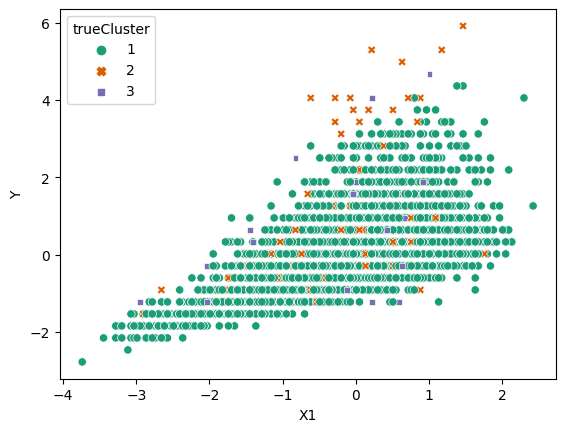

Solution reached with Cost:  2.0670654861227713


Results for full MILP
EpsVal for full MILP:  2.0670654861227713
Time taken for full MILP  600.521725346 



In [ ]:

# Clusterwise SVR with full MILP

optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = 10))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective kmlr:  0.47829758455432425
Best WS is kmlr
Max error for warm starting model:  4.558455037414825
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.50012733  0.39747225  0.02643934  1.15702644 -1.00075542 -0.21287277
   0.40553199]
 [-0.33077443 -0.08148681  0.17949569  3.012411   -2.14414772 -0.55850651
   0.36168732]
 [-0.1192439   0.38574932  0.38104957  0.19829134 -0.9675913  -0.15059127
   1.02427652]]
b at WS:  [[0.1874478 ]
 [0.22105182]
 [0.12222926]]
Set parameter TimeLimit to value 2283.6302
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  1.7488262170757638


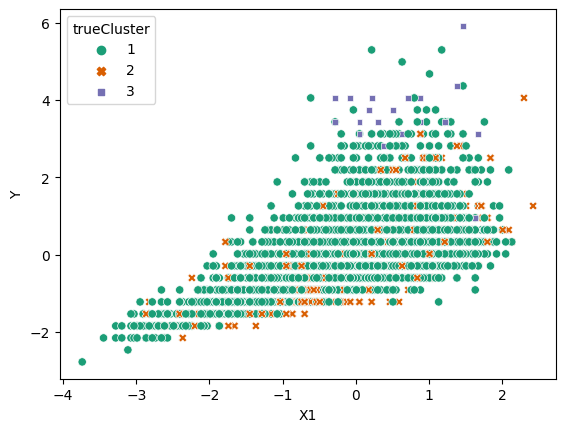

Solution reached with Cost:  1.7488262170757638


Results for full MILP
EpsVal for full MILP:  1.7488262170757638
Time taken for full MILP  2284.065410654 



In [ ]:

# Clusterwise SVR with full MILP (time of cg)
time_result_optcg = 2283.6302
optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = time_result_optcg/60))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


In [ ]:


with open(os.path.join(RESULT_DIR, 'Abalone2.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)


In [ ]:

# Save the final results 


with open(os.path.join(RESULT_DIR, 'Abalone.pkl'), 'wb') as outp:



    pickle.dump(weights_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_greedy, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    
    pickle.dump(weights_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kp, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optcg, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)



n, d = X.shape

with open(os.path.join(DATAINFO_DIR, 'Abalone.pkl'), 'wb') as outp:

    pickle.dump(n, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(d, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(K, outp, pickle.HIGHEST_PROTOCOL)

